# Project-Uber Fare Prices Prediction

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from geopy.distance import geodesic 

# Quick Analysis

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [7]:
df.drop(columns=['Unnamed: 0', 'key'], inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [9]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.duplicated().sum()

0

<Axes: xlabel='fare_amount', ylabel='Count'>

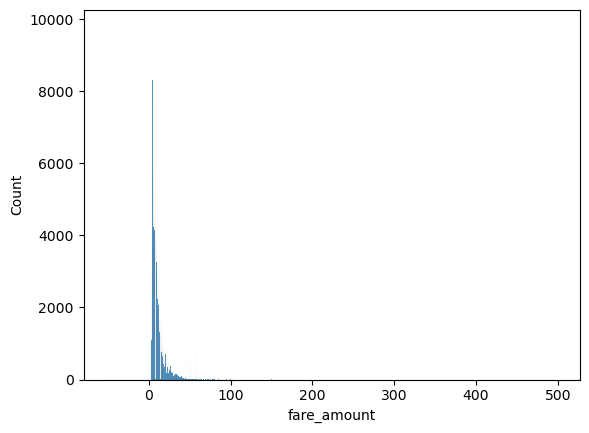

In [11]:
sns.histplot(df['fare_amount'])

<Axes: xlabel='passenger_count', ylabel='Count'>

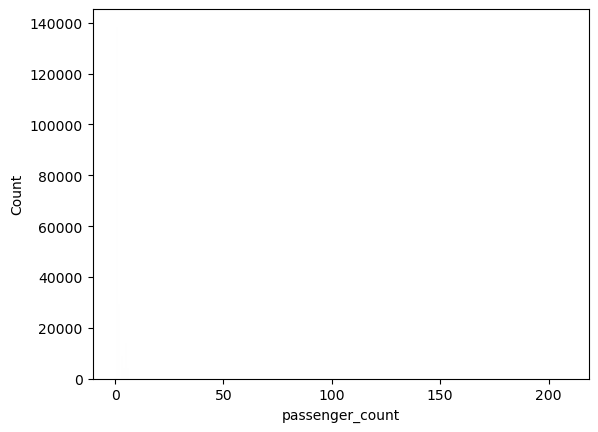

In [12]:
sns.histplot(df['passenger_count'])

<Axes: ylabel='fare_amount'>

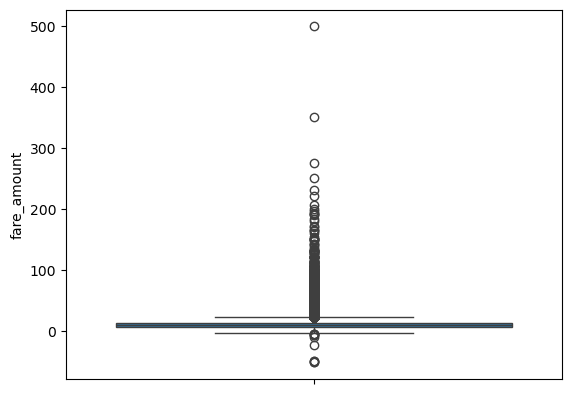

In [13]:
sns.boxplot(df['fare_amount'])

<Axes: ylabel='passenger_count'>

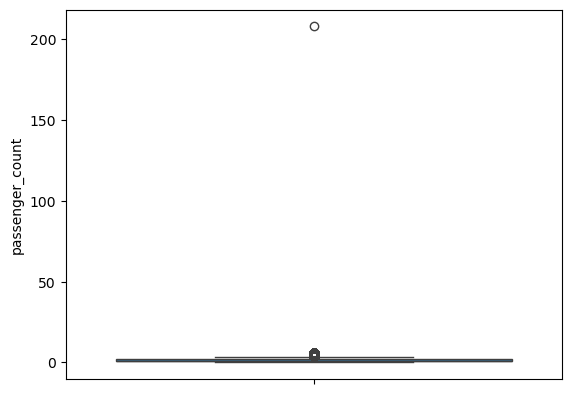

In [14]:
sns.boxplot(df['passenger_count'])

In [15]:
df[df['passenger_count']>200]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [16]:
df.drop(df[df['passenger_count']>200].index, inplace = True)

<Axes: ylabel='passenger_count'>

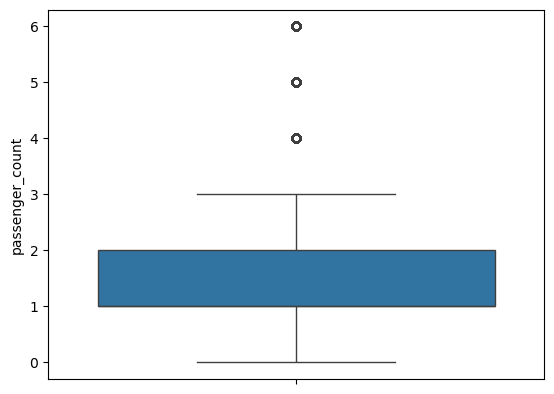

In [17]:
sns.boxplot(df['passenger_count'])

# Feature Engineering

In [18]:
# convert datetime column to datetime type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199998 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199998 non-null  float64            
 1   pickup_datetime    199998 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199998 non-null  float64            
 3   pickup_latitude    199998 non-null  float64            
 4   dropoff_longitude  199998 non-null  float64            
 5   dropoff_latitude   199998 non-null  float64            
 6   passenger_count    199998 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [20]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['weekday'] = df['pickup_datetime'].dt.weekday
df['hour'] = df['pickup_datetime'].dt.hour

In [21]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17


In [22]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
count,199998.000000,199998.000000,199998.000000,199998.000000,199998.000000,199998.000000,199998.000000,199998.000000,199998.000000,199998.000000,199998.000000
mean,11.359890,-72.527624,39.935877,-72.525285,39.923886,1.683512,2011.742442,6.281763,15.704677,3.048445,13.491415
std,9.901785,11.437844,7.720578,13.117440,6.794846,1.306965,1.856400,3.438918,8.687355,1.946945,6.515510
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734795,-73.991407,40.733823,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


In [23]:
df[(df['pickup_longitude'] < -180)] # max pickup_longitude is 57.418

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
4949,4.9,2012-04-28 00:58:00+00:00,-748.016667,40.739957,-74.003570,40.734192,1,2012,4,28,5,0
48506,33.7,2011-11-05 23:26:00+00:00,-735.200000,40.770092,-73.980187,40.765530,1,2011,11,5,5,23
75851,15.7,2011-11-05 00:22:00+00:00,-1340.648410,1644.421482,-3356.666300,872.697628,1,2011,11,5,5,0
103745,12.9,2011-10-14 19:04:00+00:00,-736.216667,40.767035,-73.982377,40.725562,1,2011,10,14,4,19
144253,7.3,2009-08-26 11:55:00+00:00,-768.550000,40.757812,-73.997040,40.740007,1,2009,8,26,2,11
161652,4.1,2010-05-12 12:19:00+00:00,-735.433332,40.740605,-74.006373,40.739607,1,2010,5,12,2,12
199936,4.1,2012-07-21 16:19:00+00:00,-736.400000,40.774307,-73.982215,40.769672,5,2012,7,21,5,16


In [24]:
df[(df['pickup_latitude'] > 90) | (df['pickup_latitude'] < -90)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
56617,8.1,2012-03-11 07:24:00+00:00,-73.960828,404.433332,-73.988357,40.769037,1,2012,3,11,6,7
61793,8.5,2012-06-13 05:45:00+00:00,-73.951385,401.066667,-73.982110,40.754117,1,2012,6,13,2,5
75851,15.7,2011-11-05 00:22:00+00:00,-1340.648410,1644.421482,-3356.666300,872.697628,1,2011,11,5,5,0
91422,16.1,2011-05-18 13:24:00+00:00,57.418457,1292.016128,1153.572603,-881.985513,1,2011,5,18,2,13


In [25]:
df[(df['dropoff_longitude'] > 180) | (df['dropoff_longitude'] < -180)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
32549,15.7,2012-06-16 10:04:00+00:00,-74.016055,40.715155,-737.916665,40.697862,2,2012,6,16,5,10
75851,15.7,2011-11-05 00:22:00+00:00,-1340.648410,1644.421482,-3356.666300,872.697628,1,2011,11,5,5,0
91422,16.1,2011-05-18 13:24:00+00:00,57.418457,1292.016128,1153.572603,-881.985513,1,2011,5,18,2,13


In [26]:
df[(df['dropoff_latitude'] > 90) | (df['dropoff_latitude'] < -90)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
75851,15.7,2011-11-05 00:22:00+00:00,-1340.648410,1644.421482,-3356.666300,872.697628,1,2011,11,5,5,0
91422,16.1,2011-05-18 13:24:00+00:00,57.418457,1292.016128,1153.572603,-881.985513,1,2011,5,18,2,13
139447,13.7,2012-01-20 11:50:00+00:00,-74.011042,40.709780,-73.983163,493.533332,4,2012,1,20,4,11


In [27]:
df.drop(df[(df['pickup_longitude'] < -180)].index, inplace = True)
df.drop(df[(df['pickup_latitude'] > 90) | (df['pickup_latitude'] < -90)].index, inplace = True)
df.drop(df[(df['dropoff_longitude'] > 180) | (df['dropoff_longitude'] < -180)].index, inplace = True)
df.drop(df[(df['dropoff_latitude'] > 90) | (df['dropoff_latitude'] < -90)].index, inplace = True)

In [28]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
count,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000
mean,11.359847,-72.501779,39.917932,-72.511601,39.922027,1.683513,2011.742472,6.281755,15.704674,3.048393,13.491589
std,9.901893,10.449981,6.130427,10.412218,6.117684,1.306964,1.856438,3.438942,8.687448,1.946960,6.515463
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.967154,40.767157,-73.963658,40.768001,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


In [29]:
def calculate_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    dropoff = (df['dropoff_latitude'], df['dropoff_longitude'])
    
    distance =geodesic(pickup, dropoff)
    return distance 
df['distance'] = df.apply(calculate_distance, axis = 1)

In [30]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,1.6811107421764293 km
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,2.4543632395347106 km
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,5.039602684044266 km
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,1.6614415240630966 km
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,4.483730087177181 km


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199986 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199986 non-null  float64            
 1   pickup_datetime    199986 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199986 non-null  float64            
 3   pickup_latitude    199986 non-null  float64            
 4   dropoff_longitude  199986 non-null  float64            
 5   dropoff_latitude   199986 non-null  float64            
 6   passenger_count    199986 non-null  int64              
 7   year               199986 non-null  int64              
 8   month              199986 non-null  int64              
 9   day                199986 non-null  int64              
 10  weekday            199986 non-null  int64              
 11  hour               199986 non-null  int64              
 12  distance           199986 non-

In [32]:
df.loc[0].distance

Distance(1.6811107421764293)

In [33]:
type(df.loc[0].distance)

geopy.distance.geodesic

In [34]:
df['distance'] = df['distance'].apply(lambda x: x.km)

In [35]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,1.681111
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,2.454363
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,5.039603
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,1.661442
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,4.483730


In [36]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
count,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000
mean,11.359847,-72.501779,39.917932,-72.511601,39.922027,1.683513,2011.742472,6.281755,15.704674,3.048393,13.491589,20.563567
std,9.901893,10.449981,6.130427,10.412218,6.117684,1.306964,1.856438,3.438942,8.687448,1.946960,6.515463,379.664699
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.215548
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.121297
75%,12.500000,-73.967154,40.767157,-73.963658,40.768001,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.874270
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,8783.593498


<Axes: ylabel='distance'>

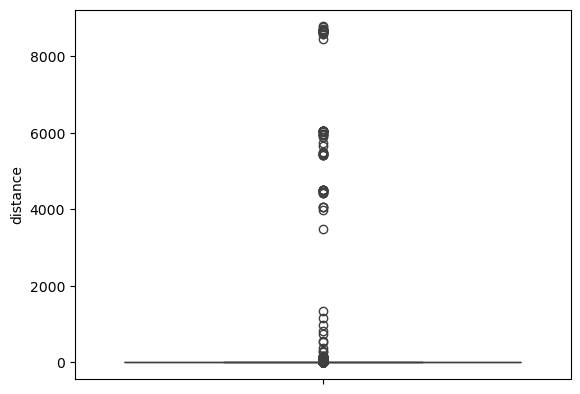

In [37]:
sns.boxplot(df['distance'])

# bi-variate Analysis

<Axes: xlabel='distance', ylabel='fare_amount'>

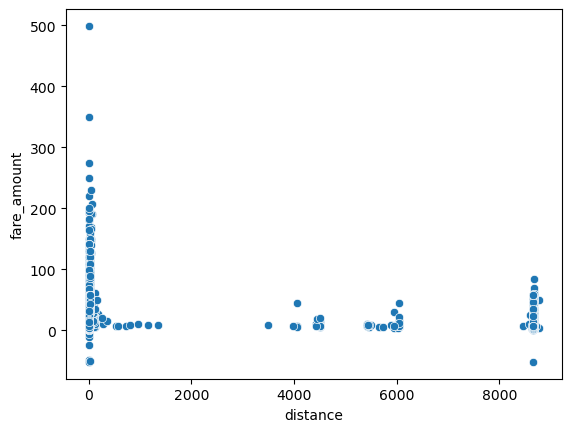

In [38]:
sns.scatterplot(df, x = 'distance', y = 'fare_amount')

<Axes: xlabel='hour', ylabel='fare_amount'>

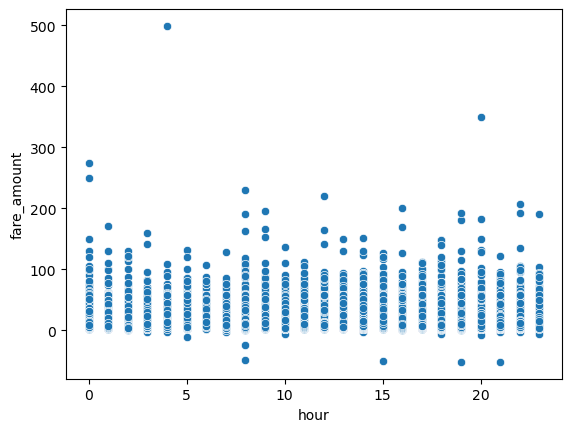

In [39]:
sns.scatterplot(df, x = 'hour', y = 'fare_amount')

<Axes: xlabel='year', ylabel='fare_amount'>

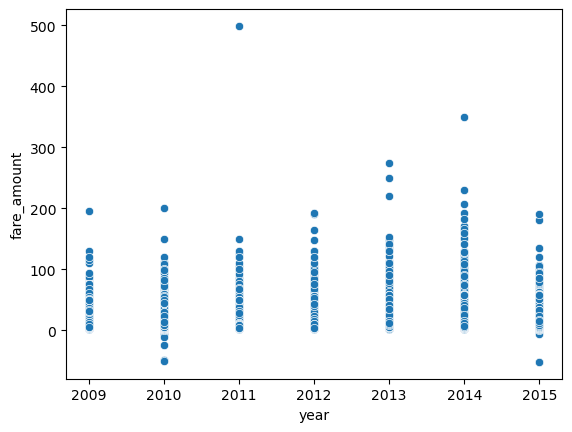

In [40]:
sns.scatterplot(df, x = 'year', y = 'fare_amount')

<Axes: xlabel='year', ylabel='fare_amount'>

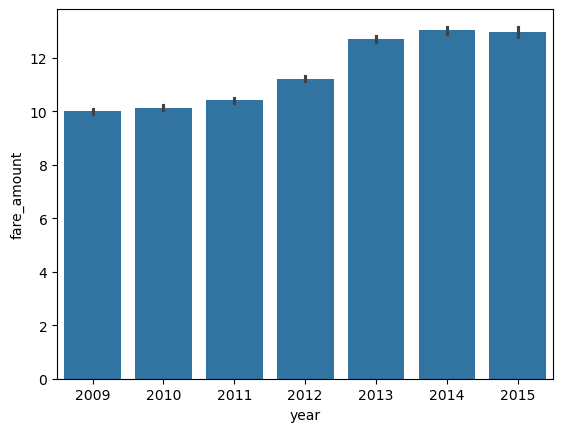

In [41]:
# Mean fare amount for each year
sns.barplot(df, x ='year', y ='fare_amount')


<Axes: xlabel='hour', ylabel='fare_amount'>

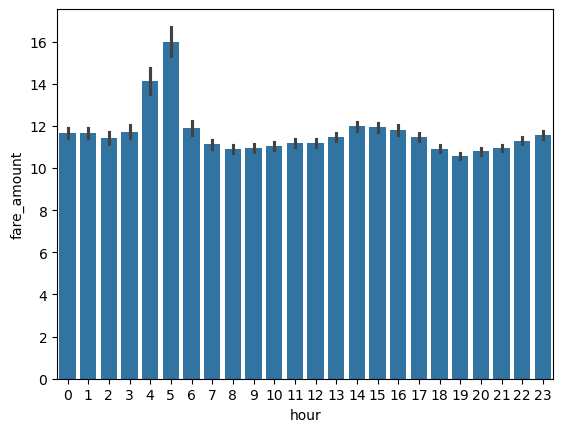

In [42]:
sns.barplot(df, x='hour', y='fare_amount')

<Axes: xlabel='month', ylabel='fare_amount'>

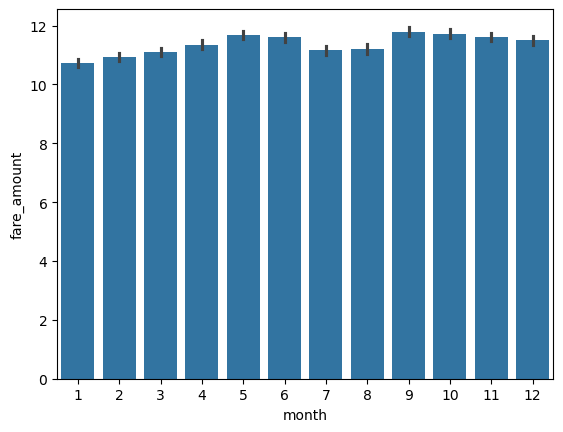

In [43]:
sns.barplot(df, x='month', y='fare_amount')

<Axes: xlabel='month', ylabel='fare_amount'>

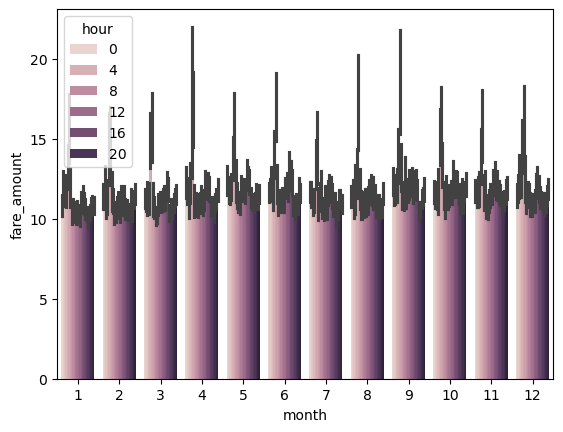

In [44]:
# Plot not clear enough
sns.barplot(df, x='month', y='fare_amount', hue='hour')

In [45]:
df[df['distance'] > 2000]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
346,15.5,2015-03-05 19:15:07+00:00,0.000000,0.000000,-73.979805,40.786030,1,2015,3,5,3,19,8666.723616
1067,52.0,2014-02-02 22:27:00+00:00,-73.781095,40.645015,0.000000,0.000000,1,2014,2,2,6,22,8647.355924
1526,2.5,2014-05-12 12:00:15+00:00,-74.001849,40.715156,0.000000,0.000000,3,2014,5,12,0,12,8667.126133
1945,7.0,2013-02-10 16:18:00+00:00,-0.131667,40.757063,-73.991593,40.749953,1,2013,2,10,6,16,6036.406419
2167,5.7,2012-07-21 12:16:00+00:00,-1.216667,40.748597,-74.004822,40.734670,1,2012,7,21,5,12,5956.148468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197468,6.9,2011-02-23 19:42:00+00:00,0.000000,0.000000,-73.980827,40.747133,5,2011,2,23,2,19,8666.023853
197863,7.0,2014-11-18 22:10:03+00:00,-73.962190,40.759158,0.000000,0.000000,1,2014,11,18,1,22,8664.718827
198567,23.5,2013-10-21 01:28:00+00:00,-73.968115,40.801455,0.000000,0.000000,2,2013,10,21,0,1,8666.064911
198665,20.1,2012-06-26 21:29:00+00:00,-0.116667,40.729775,0.000000,0.000000,5,2012,6,26,1,21,4510.579905


In [46]:
df[(df['distance'] > 500) & (df['distance'] < 2000)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
73663,8.1,2012-07-17 19:52:00+00:00,-89.933333,40.709452,-74.008302,40.744527,1,2012,7,17,1,19,1343.523298
117619,6.5,2013-03-31 19:19:00+00:00,-73.976280,47.383332,-73.975940,40.776347,6,2013,3,31,6,19,734.127548
158247,8.1,2010-05-05 16:57:29+00:00,-73.974777,40.758980,-63.156252,34.894485,1,2010,5,5,2,16,1152.220624
158815,8.0,2014-04-30 07:17:34+00:00,-73.619358,48.018760,-73.983377,40.760342,1,2014,4,30,2,7,807.073292
173360,9.7,2011-01-05 14:38:22+00:00,-75.026743,32.005119,-73.983341,40.718626,1,2011,1,5,2,14,971.407575
187422,7.3,2011-10-01 11:11:48+00:00,-67.679123,40.061852,-73.989387,40.753045,1,2011,10,1,5,11,540.989396
199403,7.0,2013-01-20 17:58:29+00:00,-67.370360,39.999790,-73.971058,40.753000,1,2013,1,20,6,17,566.615908


In [47]:
df.drop(df[df['distance'] > 500].index, inplace = True)

In [48]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
count,199559.000000,199559.000000,199559.000000,199559.000000,199559.000000,199559.000000,199559.000000,199559.000000,199559.00000,199559.000000,199559.000000,199559.000000
mean,11.352733,-72.580571,39.956748,-72.579599,39.956990,1.683537,2011.740297,6.281992,15.70537,3.048853,13.491384,3.290785
std,9.885872,10.178831,6.005934,10.178723,6.006110,1.306836,1.856410,3.438996,8.68758,1.946903,6.515765,4.195695
min,-52.000000,-77.316665,-74.015515,-75.458979,-74.015750,0.000000,2009.000000,1.000000,1.00000,0.000000,0.000000,0.000000
25%,6.000000,-73.992075,40.734875,-73.991417,40.733902,1.000000,2010.000000,3.000000,8.00000,1.000000,9.000000,1.213793
50%,8.500000,-73.981840,40.752627,-73.980116,40.753071,1.000000,2012.000000,6.000000,16.00000,3.000000,14.000000,2.116517
75%,12.500000,-73.967232,40.767180,-73.963752,40.768026,2.000000,2013.000000,9.000000,23.00000,5.000000,19.000000,3.856224
max,499.000000,40.808425,45.031653,40.831932,45.031598,6.000000,2015.000000,12.000000,31.00000,6.000000,23.000000,366.964979


<Axes: xlabel='distance', ylabel='fare_amount'>

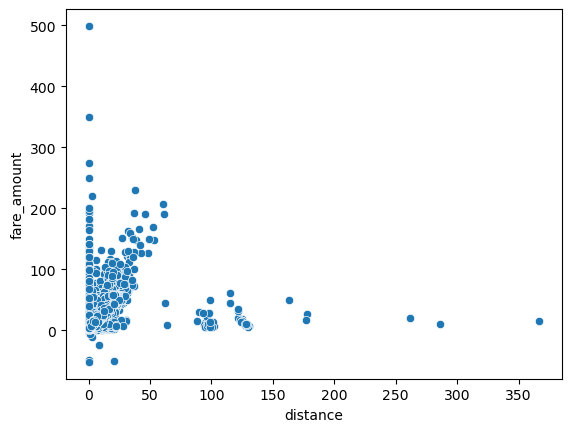

In [49]:
sns.scatterplot(df, x = 'distance', y = 'fare_amount')

In [50]:
df[df['fare_amount'] <= 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
20744,0.00,2015-04-22 23:25:07+00:00,-73.658897,40.805199,-73.658897,40.805199,1,2015,4,22,2,23,0.000000
22182,0.00,2010-03-20 02:59:51+00:00,-73.994366,40.755395,-73.998718,40.854853,2,2010,3,20,5,2,11.050929
63395,-5.00,2015-03-03 23:07:41+00:00,-73.992249,40.748936,-73.988518,40.748180,1,2015,3,3,1,23,0.326052
71246,-3.30,2010-02-11 21:47:10+00:00,-73.952725,40.768235,-73.949928,40.772208,2,2010,2,11,3,21,0.500420
79903,-3.50,2015-05-01 14:43:02+00:00,-73.982430,40.775024,-73.981750,40.778439,1,2015,5,1,4,14,0.383449
89322,-49.57,2010-03-09 08:26:10+00:00,-73.972772,40.785657,-73.972867,40.785500,5,2010,3,9,1,8,0.019190
92063,-23.70,2010-03-12 08:49:10+00:00,-73.952740,40.768233,-74.007028,40.707338,3,2010,3,12,4,8,8.170467
98875,-52.00,2015-03-20 21:31:14+00:00,-74.000359,40.728729,-74.005699,40.728680,5,2015,3,20,4,21,0.451201
104080,-7.30,2010-03-09 20:25:10+00:00,-73.952623,40.766942,-73.953787,40.784882,1,2010,3,9,1,20,1.994651
139272,-6.90,2010-02-23 18:52:10+00:00,-73.988727,40.736445,-73.977622,40.750487,1,2010,2,23,1,18,1.819695


In [51]:
df.drop(df[df['fare_amount'] == 0].index, inplace = True)

In [52]:
df['fare_amount'] = df['fare_amount'].apply(lambda x : abs(x))

In [53]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
count,199555.000000,199555.000000,199555.000000,199555.000000,199555.000000,199555.000000,199555.000000,199555.000000,199555.000000,199555.000000,199555.000000,199555.000000
mean,11.355334,-72.580916,39.956936,-72.579944,39.957177,1.683526,2011.740257,6.282063,15.705324,3.048854,13.491453,3.290795
std,9.883113,10.177635,6.005328,10.177527,6.005504,1.306826,1.856382,3.438992,8.687648,1.946909,6.515717,4.195682
min,0.010000,-77.316665,-74.015515,-75.458979,-74.015750,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992075,40.734875,-73.991417,40.733902,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.213838
50%,8.500000,-73.981840,40.752627,-73.980116,40.753071,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.116563
75%,12.500000,-73.967234,40.767180,-73.963752,40.768025,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.856224
max,499.000000,40.808425,45.031653,40.831932,45.031598,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,366.964979


<Axes: xlabel='distance', ylabel='fare_amount'>

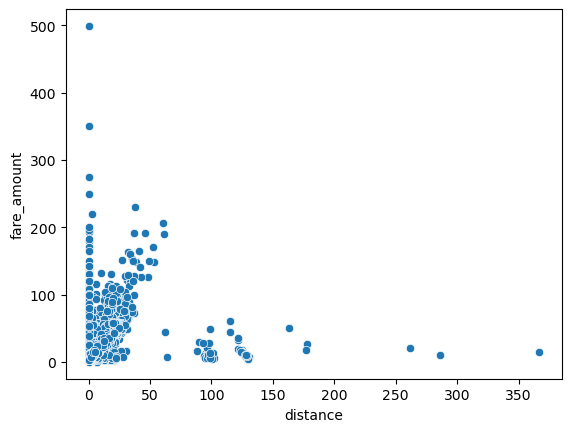

In [54]:
sns.scatterplot(df, x = 'distance', y = 'fare_amount')

C:\Users\20110\AppData\Local\Temp\ipykernel_19144\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

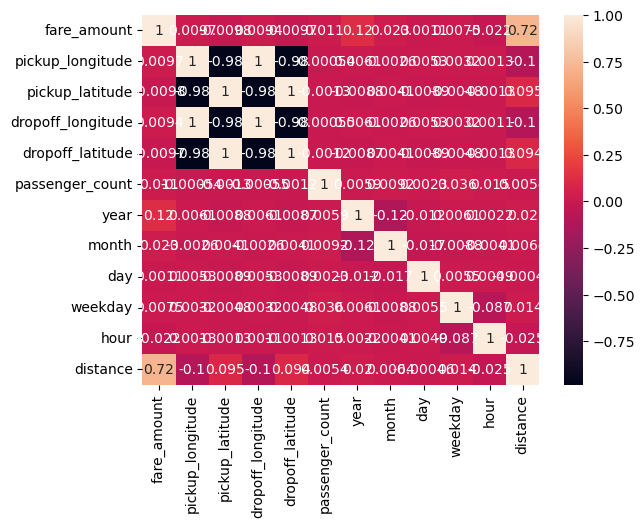

In [55]:
sns.heatmap(df.corr(), annot = True)

# Modeling

In [56]:
X = df['distance']
y = df['fare_amount']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [57]:
x_train

177881     1.128063
28273      4.392735
6535      11.063707
95806     16.403476
170546     3.328901
            ...    
4929       5.993527
147140     2.698796
152319     1.123483
110760     0.756551
188613     4.103505
Name: distance, Length: 159644, dtype: float64

In [58]:
x_test

167005     2.297538
64969      3.290233
189033     2.789199
92247     15.242740
152632     3.799211
            ...    
84267      1.130354
177369     2.700650
34761      3.285714
100712     1.438484
57322      6.517235
Name: distance, Length: 39911, dtype: float64

In [59]:
x_train.values

array([ 1.12806301,  4.39273535, 11.0637073 , ...,  1.12348254,
        0.75655138,  4.10350504])

In [60]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [61]:
# Evaluate training
y_pred = model.predict(x_train.values.reshape(-1,1))
r2_score(y_train, y_pred)

0.5220833532613889

In [62]:
# Evaluate testing
y_pred = model.predict(x_test.values.reshape(-1,1))
r2_score(y_test, y_pred)

0.4921095097162038

In [63]:
model.coef_

array([1.71956077])

<Axes: xlabel='distance', ylabel='fare_amount'>

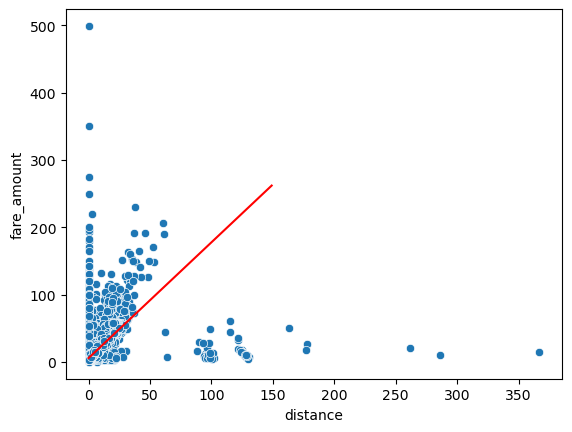

In [64]:
x = range(150)
sns.scatterplot(df, x= 'distance', y = 'fare_amount')
sns.lineplot(x = x, y = model.intercept_ + model.coef_[0]*x, c = 'red')

In [65]:
# use multiple features 
X = df[['distance', 'year']]
y = df['fare_amount']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = LinearRegression()
model.fit(x_train, y_train)

train_r2 = model.score(x_train, y_train)
test_r2 = model.score(x_test, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Training Accuracy: 0.5502491696961578
Testing Accuracy: 0.43315537434598184


In [66]:
# use polynomial Regression 
n = 6
poly = PolynomialFeatures(n)

xp_train = poly.fit_transform(x_train)
xp_test = poly.transform(x_test)

model = LinearRegression()

model.fit(xp_train,y_train)

train_r2 = model.score(xp_train, y_train)
test_r2 = model.score(xp_test, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")


Training Accuracy: 0.7157087719099409
Testing Accuracy: -8321.848873043624


<Axes: xlabel='distance', ylabel='fare_amount'>

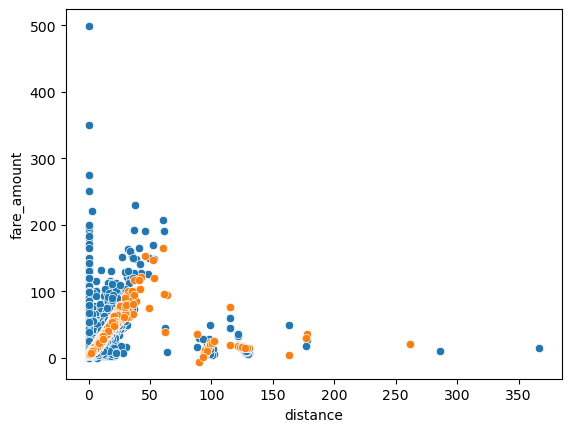

In [67]:
x = range(100)
sns.scatterplot(df, x='distance', y='fare_amount')
sns.scatterplot(x=x_train['distance'], y=model.predict(xp_train))

In [68]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)

train_r2 = dt.score(x_train, y_train)
test_r2 = dt.score(x_test, y_test)

print(f'Training Accuracy: {train_r2}\n Testing Accuracy : {test_r2}')

Training Accuracy: 0.9448360946283577
 Testing Accuracy : 0.5709136139801685


# Optimizing Model Performance

In [69]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

**Cross Validation**

In [70]:
dt = DecisionTreeRegressor()

cv = cross_validate(dt, X, y, cv=5, return_train_score = True)

In [71]:
cv['test_score']

array([0.55958078, 0.58735425, 0.58447807, 0.54136336, 0.53593405])

In [72]:
cv = cross_validate(dt, X, y, cv=10, return_train_score = True, scoring= 'r2', return_estimator = True)

In [73]:
cv

{'fit_time': array([5.42867041, 4.69055891, 5.21992016, 4.74310064, 5.14776111,
        4.55402803, 5.17466569, 5.07031679, 5.1916728 , 4.81126356]),
 'score_time': array([0.03567696, 0.03526688, 0.03558278, 0.04224372, 0.03459954,
        0.03730559, 0.03703499, 0.03644609, 0.03921318, 0.03305793]),
 'estimator': [DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor()],
 'test_score': array([0.52164081, 0.6236666 , 0.56798203, 0.55801689, 0.59090977,
        0.59423842, 0.54145044, 0.52663648, 0.51984949, 0.56796268]),
 'train_score': array([0.94802935, 0.94246355, 0.94094849, 0.94457738, 0.93953922,
        0.93924255, 0.94162492, 0.94299398, 0.93944711, 0.94503867])}

In [74]:
index_max = cv['test_score'].argmax()
cv['test_score'][index_max]

0.6236665990449649

In [75]:
index_max = cv['test_score'].argmax()
cv['estimator'][index_max]

DecisionTreeRegressor()

In [76]:
cv['estimator'][index_max].score(x_test, y_test)

0.8974241548003397

**Hyperparameter Tuning**

In [77]:
dt = DecisionTreeRegressor()

params = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [2000, 20000],
    'max_leaf_nodes': [10, 20],
    'criterion': ('squared_error', 'friedman_mse')
}

grid = GridSearchCV(dt, params)
grid.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('squared_error', 'friedman_mse'),
                         'max_depth': [4, 6, 8], 'max_leaf_nodes': [10, 20],
                         'min_samples_leaf': [2000, 20000]})

In [78]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2000}

In [79]:
grid.score(x_test, y_test)

0.7151956500318866

In [80]:
grid.score(x_train, y_train)

0.7129903112452411

In [83]:
grid.predict([[5, 2015]])

C:\Users\20110\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([15.92861743])

In [81]:
dt = DecisionTreeRegressor()

params = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [2000, 20000],
    'max_leaf_nodes': [10, 20],
    'criterion': ('squared_error', 'friedman_mse')
}

rand = RandomizedSearchCV(dt, params, n_iter=5)
rand.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=5,
                   param_distributions={'criterion': ('squared_error',
                                                      'friedman_mse'),
                                        'max_depth': [4, 6, 8],
                                        'max_leaf_nodes': [10, 20],
                                        'min_samples_leaf': [2000, 20000]})

In [82]:
rand.score(x_train, y_train), rand.score(x_test, y_test)

(0.7001829914040036, 0.7027742925228666)

# Export model to pickle

In [84]:
import joblib

In [85]:
joblib.dump(grid, 'model.pkl')

['model.pkl']

# Send request to web service

In [92]:
import requests

In [108]:
distance = 5
year = 2015

response = requests.post('http://localhost:7000/predict', json= {'distance': distance, 'year': year})

In [109]:
response

<Response [200]>

In [111]:
response.json()

{'fare': 15.93}